create sino :  (20, array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)) 

P :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

proj_id :  15 

sinogram :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

sinogram shape :  (180, 384) 

sinogram id :  17


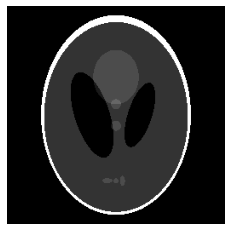

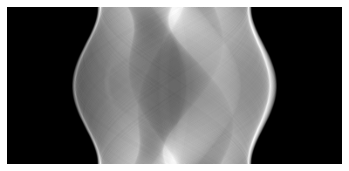

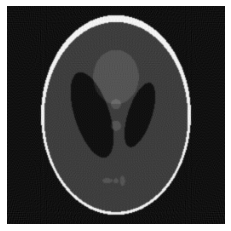

In [3]:
import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)
proj_geom = astra.create_proj_geom('parallel', 1.0, 384, np.linspace(0,np.pi,180,False))

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip', proj_geom, vol_geom)

# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)

print('create sino : ', astra.create_sino(P, proj_id), '\n')
print('P : ', P, '\n')
print('proj_id : ', proj_id, '\n')
print('sinogram : ', sinogram, '\n')
print('sinogram shape : ', sinogram.shape, '\n')
print('sinogram id : ', sinogram_id)

import pylab
pylab.gray()
pylab.figure(1)
pylab.axis('off')
pylab.imshow(P)
pylab.figure(2)
pylab.axis('off')

pylab.imshow(sinogram)

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('FBP')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure(3)
pylab.axis('off')
pylab.imshow(rec)
pylab.show()

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

### minc, maxc 미적용버전

sinogram_T shape :  (361, 864) 

-64.465256
[[84.838036 85.80366  81.912926 ... 81.98133  86.99981  85.4502  ]
 [85.02079  85.39512  80.93708  ... 81.07223  85.72507  84.3067  ]
 [88.69821  89.94118  85.232346 ... 85.096954 89.22214  87.65564 ]
 ...
 [89.20361  89.615364 84.95513  ... 84.80729  88.6264   87.0201  ]
 [84.7738   85.03563  80.55795  ... 80.85942  85.7784   83.59263 ]
 [84.19161  85.45677  81.150764 ... 81.761696 86.969864 85.28202 ]]


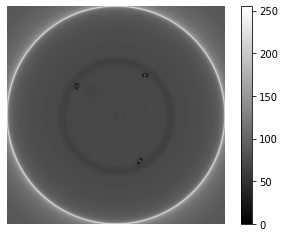

In [37]:
import astra
from astra import data2d
import numpy as np
from imageio import imread, imwrite
from os.path import join, isdir
import matplotlib.pyplot as plt

N = 864
num_angles = 361
angles = np.linspace(0, 2*np.pi, num_angles, False)
num_detector_pixels = 864
rel_detector_size = 1.0

vol_geom = astra.create_vol_geom(N, N)
proj_geom = astra.create_proj_geom('parallel', rel_detector_size, num_detector_pixels, angles)

proj_id = astra.create_projector('linear', proj_geom, vol_geom)

#load sinogram
import scipy.io
sinogram = np.loadtxt('C:\\Users\\USER\\Desktop\\RP_lab\\XRF\\sinogram0514_Cylinder\\sinogram900.csv', delimiter=",", dtype=np.float32)
sinogram_T = np.transpose(sinogram)
sinogram_id = data2d.create('-sino', proj_geom, 0)
# print('sinogram_T : ', sinogram_T, '\n')
print('sinogram_T shape : ', sinogram_T.shape, '\n')
# print('sinogram id : ', sinogram_id)

rec_type = 'FBP'
filter_type = 'hann'

rec_id1, rec1 = astra.create_reconstruction(rec_type, proj_id, sinogram_T, filterType = filter_type)


print(np.min(rec1))
rec1 = (rec1 - np.min(rec1))


rec1 /= np.max(rec1)
rec1 = rec1*255



print(rec1)
plt.axis('off')
plt.imshow(rec1, cmap='gray')
plt.colorbar()

astra.data2d.delete(proj_id)
astra.data2d.delete(rec_id1)
astra.data2d.clear()

### minc, maxc 적용버전

sinogram_T shape :  (361, 864) 

-64.465256
[[84.838036 85.80366  81.912926 ... 81.98133  86.99981  85.4502  ]
 [85.02079  85.39512  80.93708  ... 81.07223  85.72507  84.3067  ]
 [88.69821  89.94118  85.232346 ... 85.096954 89.22214  87.65564 ]
 ...
 [89.20361  89.615364 84.95513  ... 84.80729  88.6264   87.0201  ]
 [84.7738   85.03563  80.55795  ... 80.85942  85.7784   83.59263 ]
 [84.19161  85.45677  81.150764 ... 81.761696 86.969864 85.28202 ]]


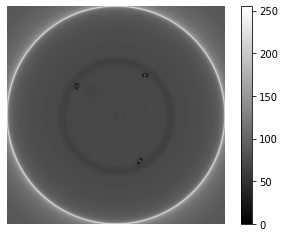

In [38]:
import astra
from astra import data2d
import numpy as np
from imageio import imread, imwrite
from os.path import join, isdir
import matplotlib.pyplot as plt

N = 864
num_angles = 361
angles = np.linspace(0, 2*np.pi, num_angles, False)
num_detector_pixels = 864
rel_detector_size = 1.0

vol_geom = astra.create_vol_geom(N, N)
proj_geom = astra.create_proj_geom('parallel', rel_detector_size, num_detector_pixels, angles)

proj_id = astra.create_projector('linear', proj_geom, vol_geom)

#load sinogram
import scipy.io
sinogram = np.loadtxt('C:\\Users\\USER\\Desktop\\RP_lab\\XRF\\sinogram0514_Cylinder\\sinogram900.csv', delimiter=",", dtype=np.float32)

sinogram = np.where(sinogram < 0, 0, sinogram)

sinogram_T = np.transpose(sinogram)
sinogram_id = data2d.create('-sino', proj_geom, 0)
# print('sinogram_T : ', sinogram_T, '\n')
print('sinogram_T shape : ', sinogram_T.shape, '\n')
# print('sinogram id : ', sinogram_id)

rec_type = 'FBP'
filter_type = 'hann'

rec_id, rec = astra.create_reconstruction(rec_type, proj_id, sinogram_T, use_minc='yes', minc=0, use_maxc='yes', maxc=255, filterType = filter_type)


# rec = np.where(rec < 0, 250, rec)
print(np.min(rec))
rec = (rec - np.min(rec))


rec /= np.max(rec)
rec = rec*255

print(rec)
plt.axis('off')
plt.imshow(rec, cmap='gray')
plt.colorbar()